In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from SBRx import sosf,acf,ps,sosfnorm,sosfw

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [2]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
#lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=65
max0=145

In [3]:
inputf='604.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [4]:
for i in 0,2,4:
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataI'+str(int(lr[Nx]))+'.csv')

In [5]:
datap='dataI6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,-250.043594,2277.239467
std,23.243169,6.256047,10.420092,3750.107456
min,65.710000,0.000000,-277.593319,27.150000
25%,85.485000,4.000000,-257.836471,281.925000
50%,105.270000,9.000000,-249.888052,1017.500000
75%,125.045000,15.000000,-244.018098,2403.500000
max,144.830000,19.600000,-205.463695,30960.000000


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


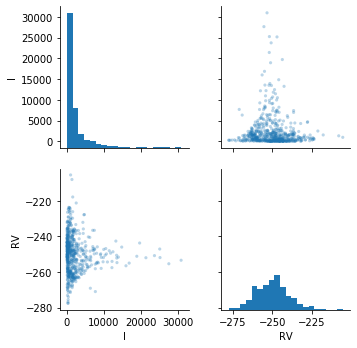

In [6]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


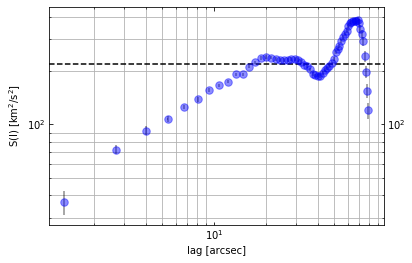

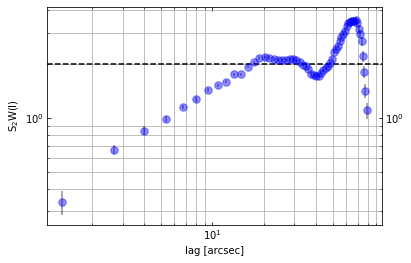

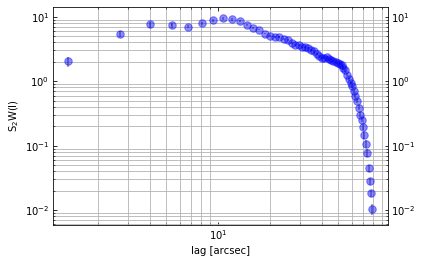

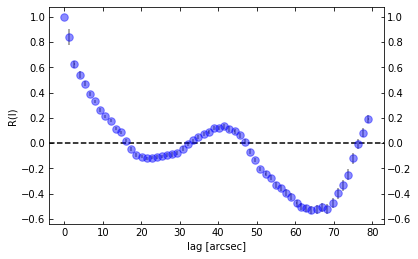

In [7]:
sfH00=sosf(dt)
sfnH00=sosfnorm(dt)
sfwH00=sosfw(dt)
afH00=acf(dt)
#psH00=ps(dt)

In [8]:
datap='dataI6583.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,-224.950913,333.340168
std,23.243169,6.256047,30.938421,440.691257
min,65.710000,0.000000,-271.562197,7.410000
25%,85.485000,4.000000,-236.644094,65.727500
50%,105.270000,9.000000,-229.642258,192.300000
75%,125.045000,15.000000,-221.934545,413.950000
max,144.830000,19.600000,39.843065,3893.000000


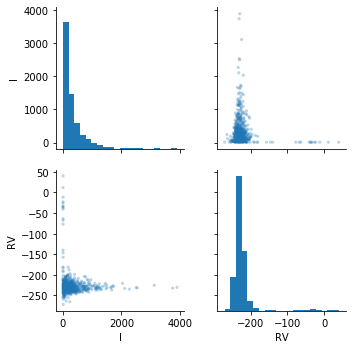

In [9]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [10]:
mrv=(dt.RV<-180)&(dt.RV>-300)
dt=dt[mrv]

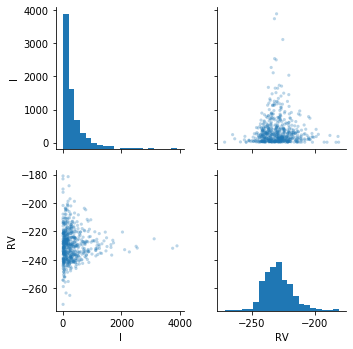

In [11]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


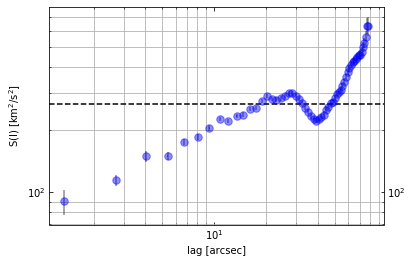

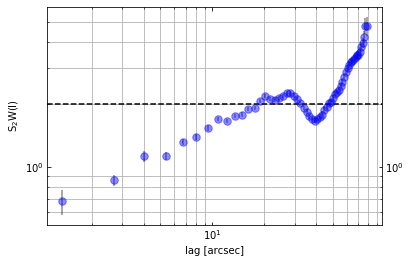

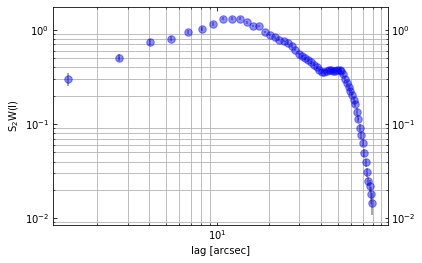

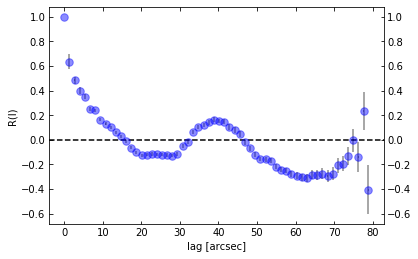

In [12]:
sfN00=sosf(dt)
sfNH00=sosfnorm(dt)
sfwN00=sosfw(dt)
afN00=acf(dt)
#psN00=ps(dt)

In [13]:
datap='dataI6731.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,-230.345848,168.994135
std,23.243169,6.256047,26.771015,201.362479
min,65.710000,0.000000,-337.580629,-1343.000000
25%,85.485000,4.000000,-240.808372,40.177500
50%,105.270000,9.000000,-233.915951,113.600000
75%,125.045000,15.000000,-227.034665,231.750000
max,144.830000,19.600000,44.520025,1568.000000


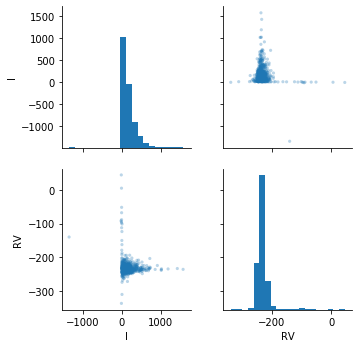

In [14]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [15]:
mrv=(dt.RV<-180)&(dt.RV>-250)
dt=dt[mrv]

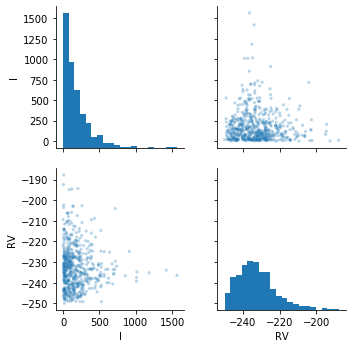

In [16]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

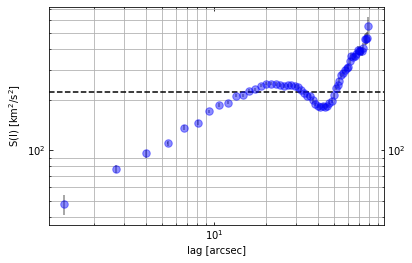

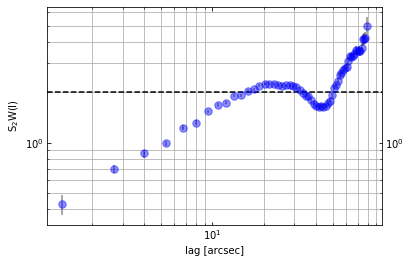

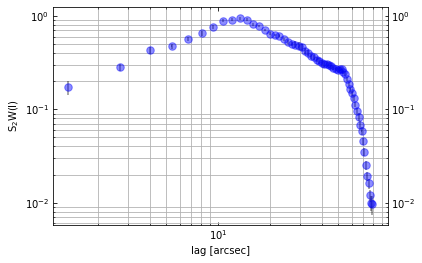

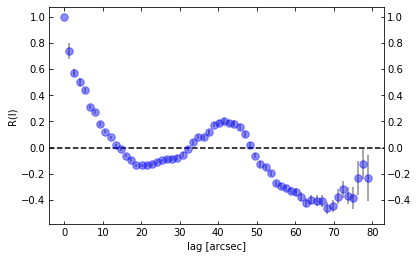

In [17]:
sfS00=sosf(dt)
sfSH00=sosfnorm(dt)
sfwS00=sosfw(dt)
afS00=acf(dt)
#psS00=ps(dt)

In [18]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
#lr=[6562.8,6548,6583,6717,6731]#AngstromsR
lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=95
max0=135

inputf='604.Isis.WHT.Blue.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [19]:
for i in 0,2:
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lb[Nx])/lb[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataI'+str(int(lb[Nx]))+'.csv')

In [20]:
datap='dataI5006.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,280.000000,280.000000,280.000000,2.800000e+02
mean,115.147200,9.390000,-29724.197934,-1.053929e+18
std,11.575098,6.262024,90499.835640,1.763560e+19
min,95.836800,0.000000,-299766.779000,-2.951000e+20
25%,105.492000,4.000000,-236.217025,3.373500e+01
50%,115.147200,9.000000,-229.421115,7.487500e+01
75%,124.802400,15.000000,-221.742035,1.790250e+02
max,134.457600,19.600000,127916.931049,1.715000e+03


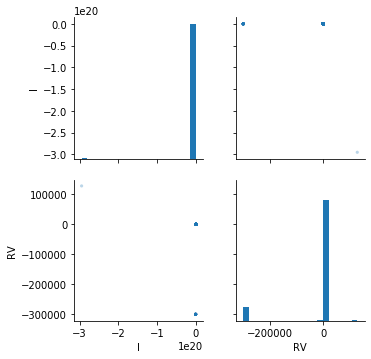

In [21]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [22]:
mrv=(dt.RV<-160)&(dt.RV>-260)
dt=dt[mrv]

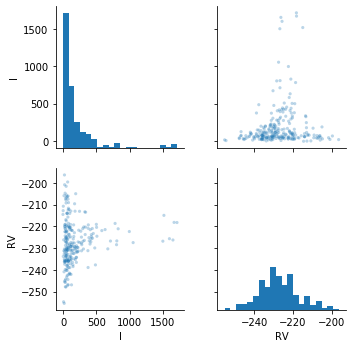

In [23]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

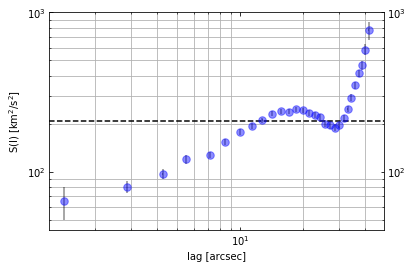

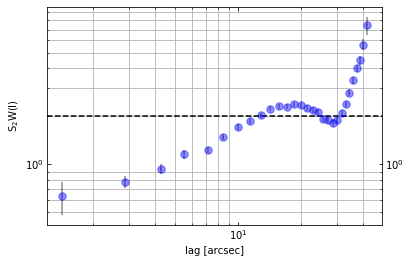

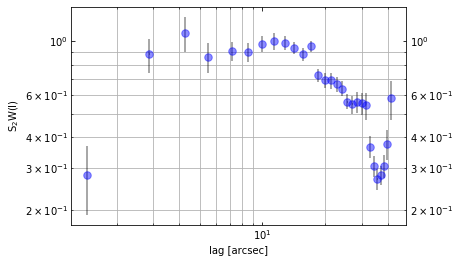

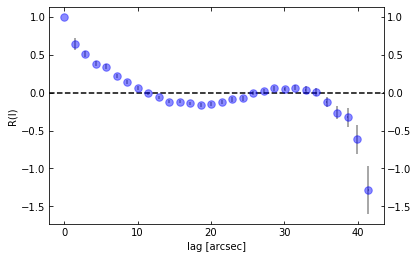

In [24]:
sfS00=sosf(dt)
sfSH00=sosfnorm(dt)
sfwS00=sosfw(dt)
afS00=acf(dt)
#psS00=ps(dt)